In [11]:
import tensorflow as tf
import pathlib
import os, sys
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from rimworld.utils import read_metadata #one_hot_encodene_hot_encode




In [ ]:
model = tf.keras.models.load_model('model15052021')

In [139]:
test_data_dir = r"D:\Projects\nsynth-data\data\stft\valid"
test_data_dir = pathlib.Path(test_data_dir)

# label_dir = r"D:\Projects\nsynth-data\data/nsynth-test"
# test_jsondata = read_metadata(label_dir).sort_index()
# test_labels = test_jsondata.instrument_family

In [149]:
batch_size = 16
img_height = 126
img_width = 1025

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir, 
    label_mode = 'categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode = 'grayscale',
    shuffle=False
)



Found 12678 files belonging to 33 classes.


In [142]:
len(labels)

0

In [150]:
import time
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])


    
df = pd.DataFrame(tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy())
df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,465,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7,177,11,3,246,57,174,9,11,...,0,0,0,40,0,0,0,0,0,11
3,0,0,16,0,0,0,0,10,9,0,...,631,0,6,86,0,0,16,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,146,0,2,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,2,13,0,2,0,...,0,0,0,0,0,0,11,0,228,0
9,4,8,379,303,14,263,0,91,10,10,...,0,0,0,3,0,0,2,0,0,212


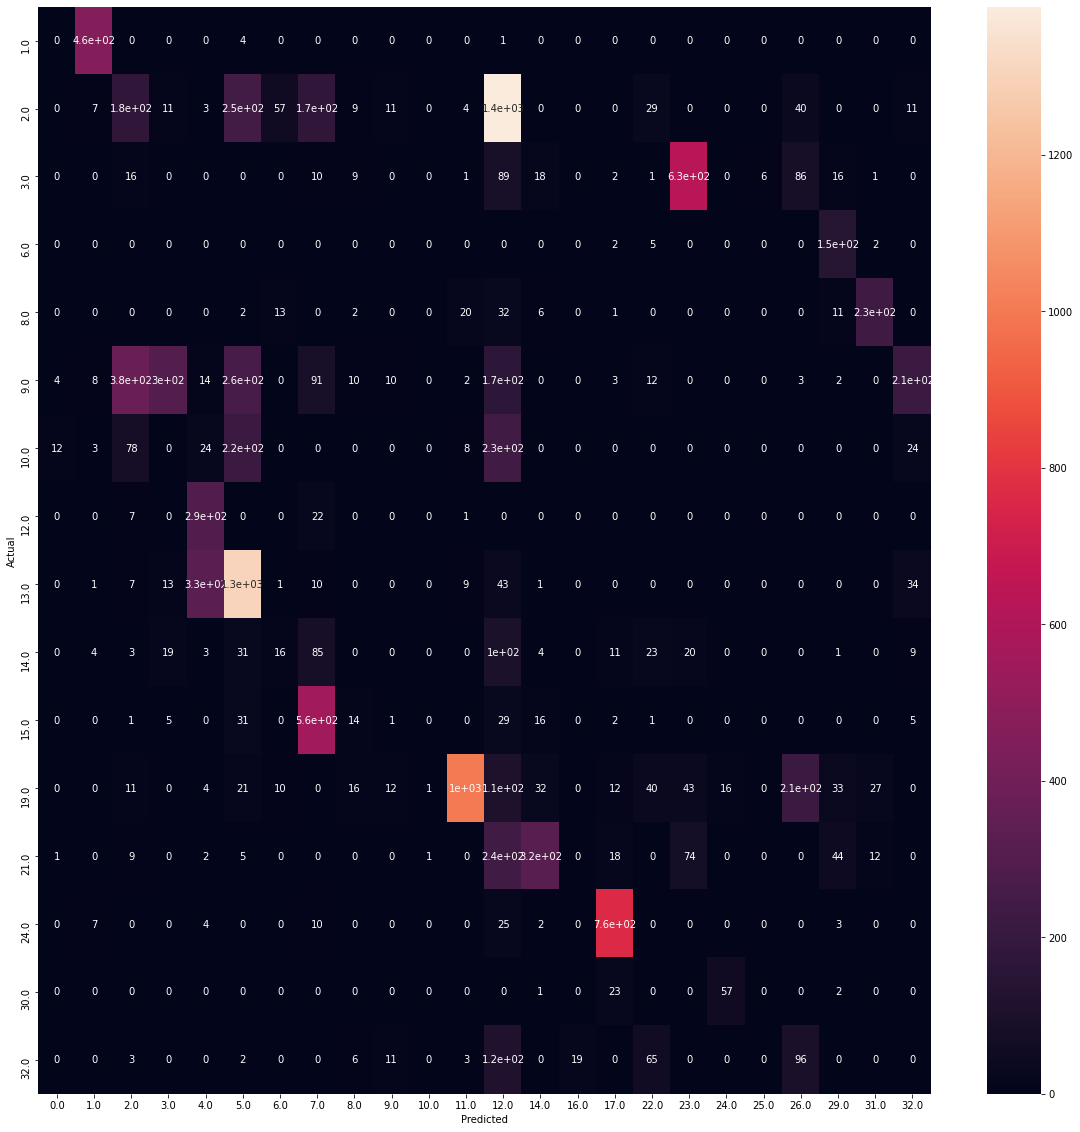

In [151]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

data = {'y_Actual':    labels,
        'y_Predicted': predictions
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)

plt.show()


In [75]:
predictions = model.predict(test_ds)
predictions.shape
predictions

array([[6.41303633e-12, 1.92785576e-01, 6.48149312e-01, ...,
        3.96680418e-17, 9.10085729e-10, 8.85415543e-03],
       [1.71971710e-14, 4.65657904e-05, 8.35052729e-01, ...,
        2.59434360e-16, 5.39642198e-09, 2.19046015e-05],
       [3.04543596e-06, 9.87980783e-01, 1.78637810e-03, ...,
        2.39379293e-16, 2.20177853e-07, 1.02744605e-04],
       ...,
       [1.44847989e-09, 2.84492526e-05, 4.56965089e-01, ...,
        9.25155309e-20, 6.30241790e-13, 3.61581370e-02],
       [2.85267528e-17, 1.41783321e-10, 9.91707072e-02, ...,
        1.08381623e-23, 6.72933848e-16, 9.35745612e-03],
       [7.62789306e-19, 2.34290282e-10, 4.52906862e-02, ...,
        3.60287764e-24, 6.99260373e-17, 2.10989121e-04]], dtype=float32)

In [95]:
# y = np.concatenate([y for x, y in test_ds], axis=0)
y = test_ds.class_names
y

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [92]:
cnt = 0 

bla= np.ndarray(test_ds.as_numpy_iterator())
# for _ ,y in test_ds:
    
#     cnt += 1
        
# print(cnt)

TypeError: expected sequence object with len >= 0 or a single integer

In [68]:
test_labels[:10]

bass_electronic_018-022-100    0
bass_electronic_018-023-025    0
bass_electronic_018-023-075    0
bass_electronic_018-023-127    0
bass_electronic_018-024-025    0
bass_electronic_018-024-100    0
bass_electronic_018-026-025    0
bass_electronic_018-026-075    0
bass_electronic_018-026-127    0
bass_electronic_018-027-075    0
Name: instrument_family, dtype: int64

In [50]:
def reverse_onehot(data):
    new_list = []

    for e in data:
        new_list.append(np.argmax(e))
    return new_list

In [76]:
pred = reverse_onehot(predictions)

In [73]:
labels = reverse_onehot(y)

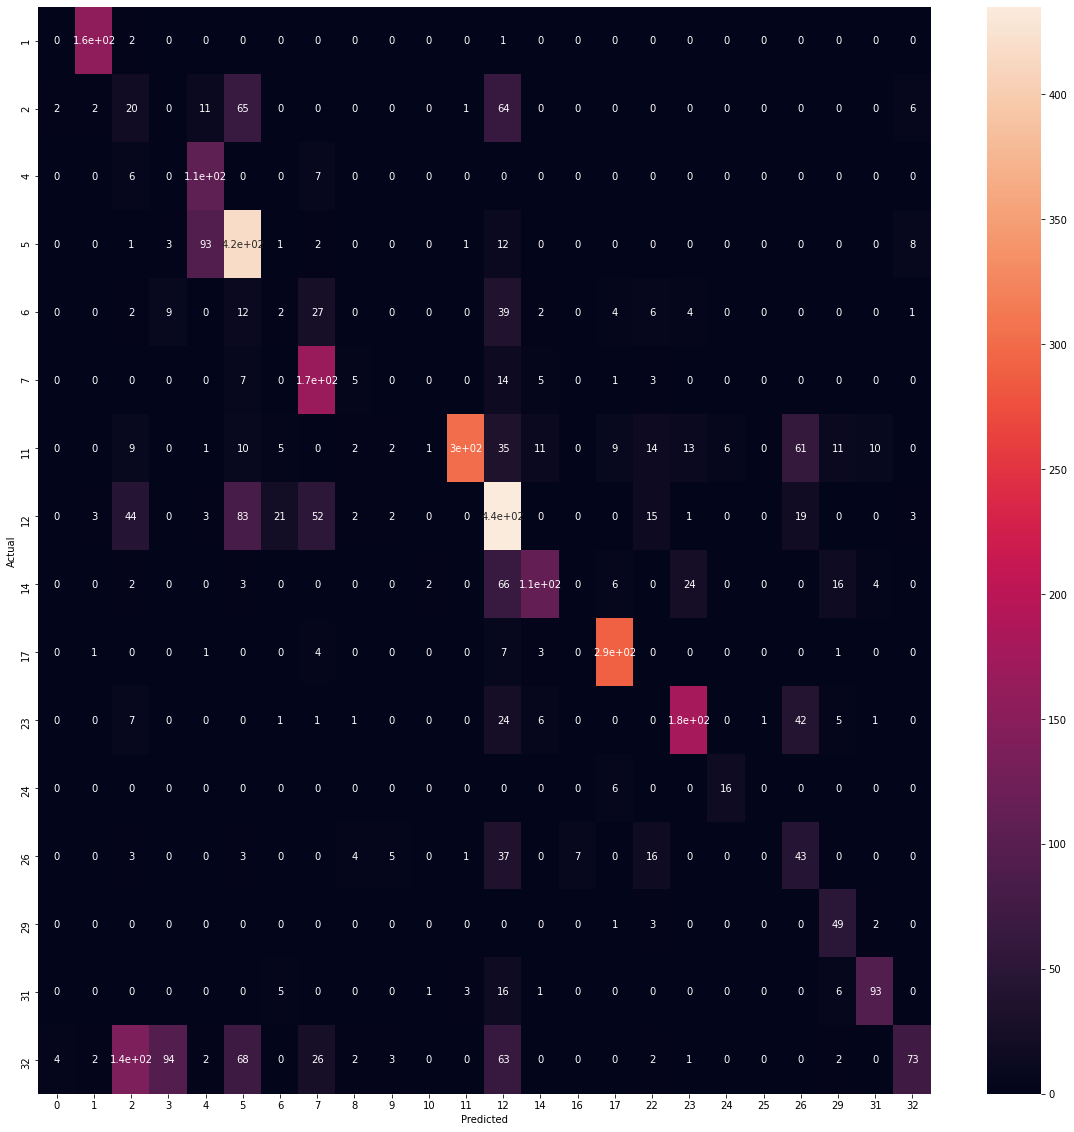

,y_Actual,y_Predicted
0,1,2
1,1,2
2,1,1
3,1,1
4,1,1
...,...,...
4091,32,22
4092,32,12
4093,32,2
4094,32,7


In [53]:
tf.math.confusion_matrix(
    labels, pred
)


<tf.Tensor: shape=(33, 33), dtype=int32, numpy=
array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 10, 16, ...,  0,  1,  3],
       [ 0,  5, 11, ...,  0,  3,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  8,  5, ...,  0,  7,  3],
       [ 0, 23, 25, ...,  0, 22,  8]])>